In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_squared_error

#load_data 
df=pd.read_excel("CG_FC.xlsx")
df2=pd.read_excel("CG_WC.xlsx")
print(df.shape)
df.head(5)

(36, 12)


,Temperature (oC),Mass(gm),Vp(km/s),Vs(km/s),Φ (%),Vv (cc/gm),Unnamed: 6,DmL,VpL,VsL,ΦL,VvL
0,25,38.9990,5.74600,2.81300,0.0720,0.000278,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,50,38.9857,5.62700,2.77467,0.1140,0.000315,NaN,0.000341,0.020710,0.013626,0.583333,0.134773
2,75,38.9723,5.50800,2.73633,0.1560,0.000353,NaN,0.000685,0.041420,0.027256,1.166667,0.269543
3,100,38.9590,5.38900,2.69800,0.1980,0.000390,NaN,0.001026,0.062130,0.040882,1.750000,0.404317
4,125,38.9545,5.22125,2.65275,0.2275,0.000590,NaN,0.001141,0.091324,0.056968,2.159722,1.121583


In [2]:
df2.head()

,Temperature (oC),Mass(gm),Vp(km/s),Vs(km/s),Φ (%),Vv (cc/gm),Unnamed: 6,DmL,VpL,VsL,ΦL,VvL
0,25,38.9990,5.52700,2.576,1.05500,0.004022,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,50,38.9863,5.33867,2.566,1.36633,0.004781,NaN,0.000326,0.034075,0.003882,0.295100,0.188712
2,75,38.9737,5.15033,2.556,1.67767,0.005540,NaN,0.000649,0.068151,0.007764,0.590209,0.377424
3,100,38.9610,4.96200,2.546,1.98900,0.006299,NaN,0.000974,0.102225,0.011646,0.885308,0.566136
4,125,38.9570,4.87200,2.542,2.07825,0.006956,NaN,0.001077,0.118509,0.013199,0.969905,0.729426


In [3]:
df.drop(['Unnamed: 6','DmL','VpL','VsL','VvL','ΦL','Vv (cc/gm)'],axis= 'columns',inplace=True)

In [4]:
df2.drop(['Unnamed: 6','DmL','VpL','VsL','VvL','ΦL','Vv (cc/gm)'],axis= 'columns',inplace=True)

In [5]:
df.rename(columns={'Temperature (oC)':'Temperature(°C)','Mass(gm) ':'Mass','Vp(km/s)':'P-wave velocity','Vs(km/s)':'S-wave velocity','Φ (%)':'Porosity(%)'},inplace=True)

In [6]:
df2.rename(columns={'Temperature (oC)':'Temperature(°C)','Mass(gm) ':'Mass','Vp(km/s)':'P-wave velocity','Vs(km/s)':'S-wave velocity','Φ (%)':'Porosity(%)'},inplace=True)

In [7]:
df

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity(%)
0,25,38.9990,5.746000,2.813000,0.07200
1,50,38.9857,5.627000,2.774670,0.11400
2,75,38.9723,5.508000,2.736330,0.15600
3,100,38.9590,5.389000,2.698000,0.19800
4,125,38.9545,5.221250,2.652750,0.22750
5,150,38.9500,5.053500,2.607500,0.25700
6,175,38.9455,4.885750,2.562250,0.28650
7,200,38.9410,4.718000,2.517000,0.31600
8,225,38.9380,4.585750,2.502500,0.42675
9,250,38.9350,4.453500,2.488000,0.53750


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature(°C)  36 non-null     int64  
 1   Mass             36 non-null     float64
 2   P-wave velocity  36 non-null     float64
 3   S-wave velocity  36 non-null     float64
 4   Porosity(%)      36 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.5 KB


In [9]:
df.describe()

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity(%)
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,462.500000,38.864872,3.044236,1.697366,3.126264
std,263.391344,0.128438,1.757305,0.901816,2.668727
min,25.000000,38.410000,0.356542,0.213925,0.072000
25%,243.750000,38.819375,1.359468,0.815680,0.509813
50%,462.500000,38.907750,3.263500,1.954875,2.733625
75%,681.250000,38.935750,4.486562,2.491625,5.228813
max,900.000000,38.999000,5.746000,2.813000,9.325000


In [10]:
df.corr()

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity(%)
Temperature(°C),1.000000,-0.810168,-0.995909,-0.976172,0.967476
Mass,-0.810168,1.000000,0.800029,0.824025,-0.875772
P-wave velocity,-0.995909,0.800029,1.000000,0.989170,-0.965767
S-wave velocity,-0.976172,0.824025,0.989170,1.000000,-0.971055
Porosity(%),0.967476,-0.875772,-0.965767,-0.971055,1.000000


In [11]:
df2

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity(%)
0,25,38.9990,5.52700,2.576000,1.05500
1,50,38.9863,5.33867,2.566000,1.36633
2,75,38.9737,5.15033,2.556000,1.67767
3,100,38.9610,4.96200,2.546000,1.98900
4,125,38.9570,4.87200,2.542000,2.07825
5,150,38.9530,4.78200,2.538000,2.16750
6,175,38.9490,4.69200,2.534000,2.25675
7,200,38.9450,4.60200,2.530000,2.34600
8,225,38.9415,4.23375,2.446500,2.43400
9,250,38.9380,3.86550,2.363000,2.52200


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature(°C)  36 non-null     int64  
 1   Mass             36 non-null     float64
 2   P-wave velocity  36 non-null     float64
 3   S-wave velocity  36 non-null     float64
 4   Porosity(%)      36 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.5 KB


In [13]:
df2.describe()

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity(%)
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,462.500000,38.691222,2.653658,1.554195,4.739528
std,263.391344,0.389445,1.620679,0.859571,2.738810
min,25.000000,37.785000,0.381240,0.228744,1.055000
25%,243.750000,38.560000,1.191375,0.714825,2.500000
50%,462.500000,38.899750,2.603125,1.681125,3.756375
75%,681.250000,38.938875,3.957562,2.383875,6.715813
max,900.000000,38.999000,5.527000,2.576000,9.987000


In [14]:
#making a copy of each dataframe
data_CG_FC=df
data_CG_WC=df2

In [15]:
# #size of plot
# plt.subplots(figsize=(15,15))

# plt.plot(df.Temp,df.Phi,color='Red')
# plt.scatter(df.Temp,df.Phi,color='Red')
# plt.plot(df.Temp,df2.Phi,color='Blue')
# plt.scatter(df.Temp,df2.Phi,color='Blue')


# #curve representation
# plt.legend(['Furnace cooling','Water cooling'],fontsize=25)
# plt.xlabel("Temperature(oC)")
# plt.ylabel("Porosity(%)")
# plt.show()

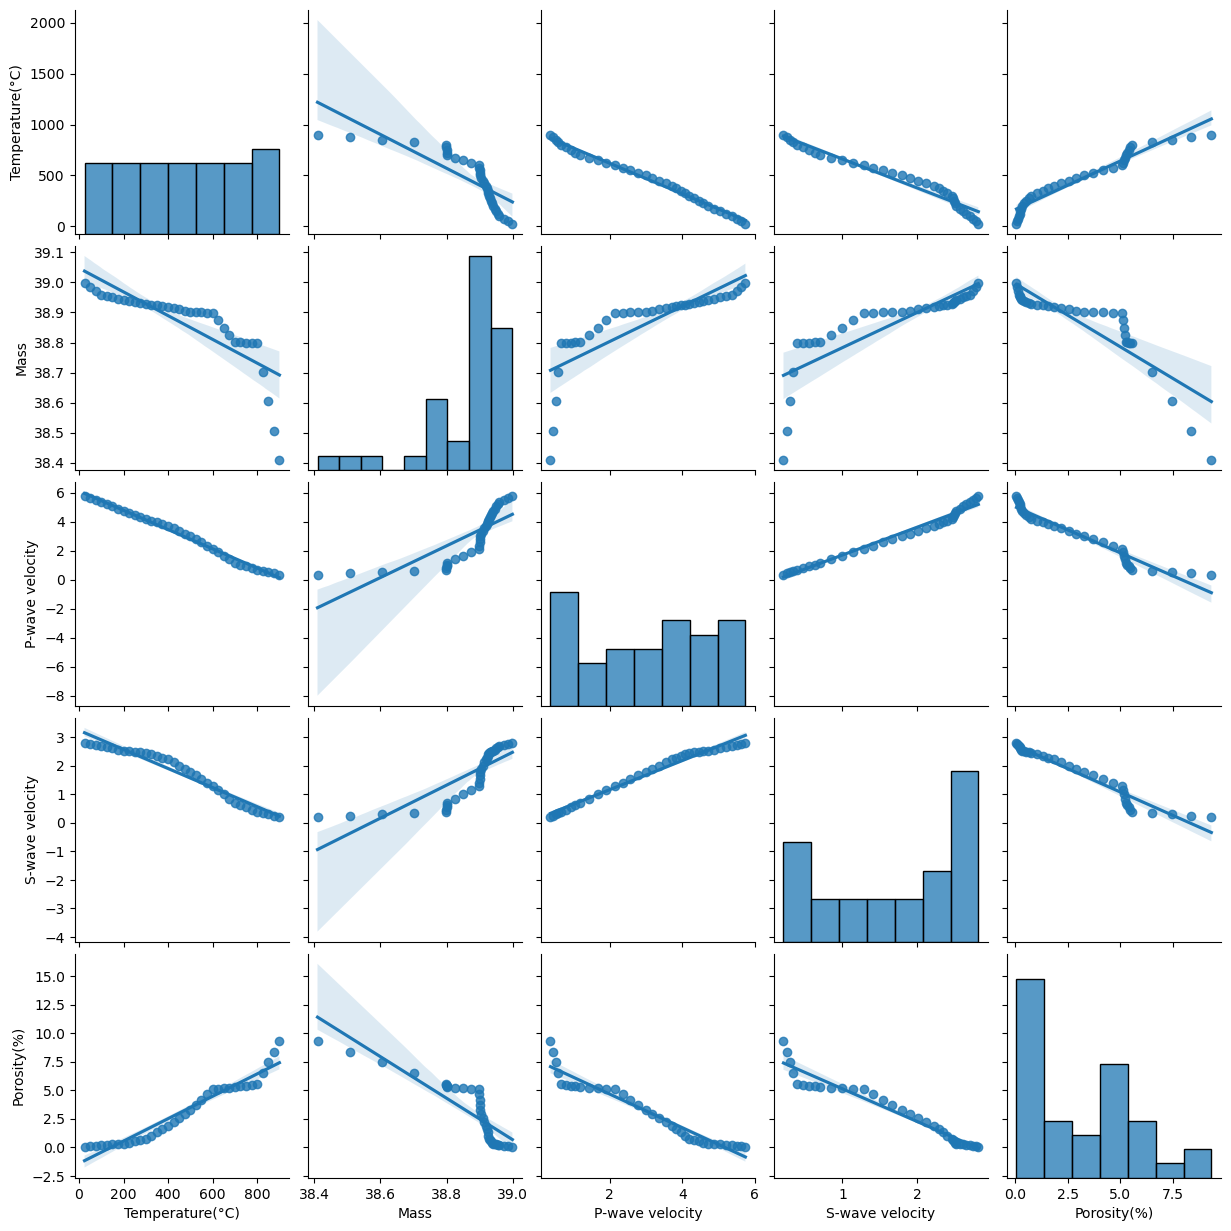

In [16]:
sns.pairplot(df,kind="reg")

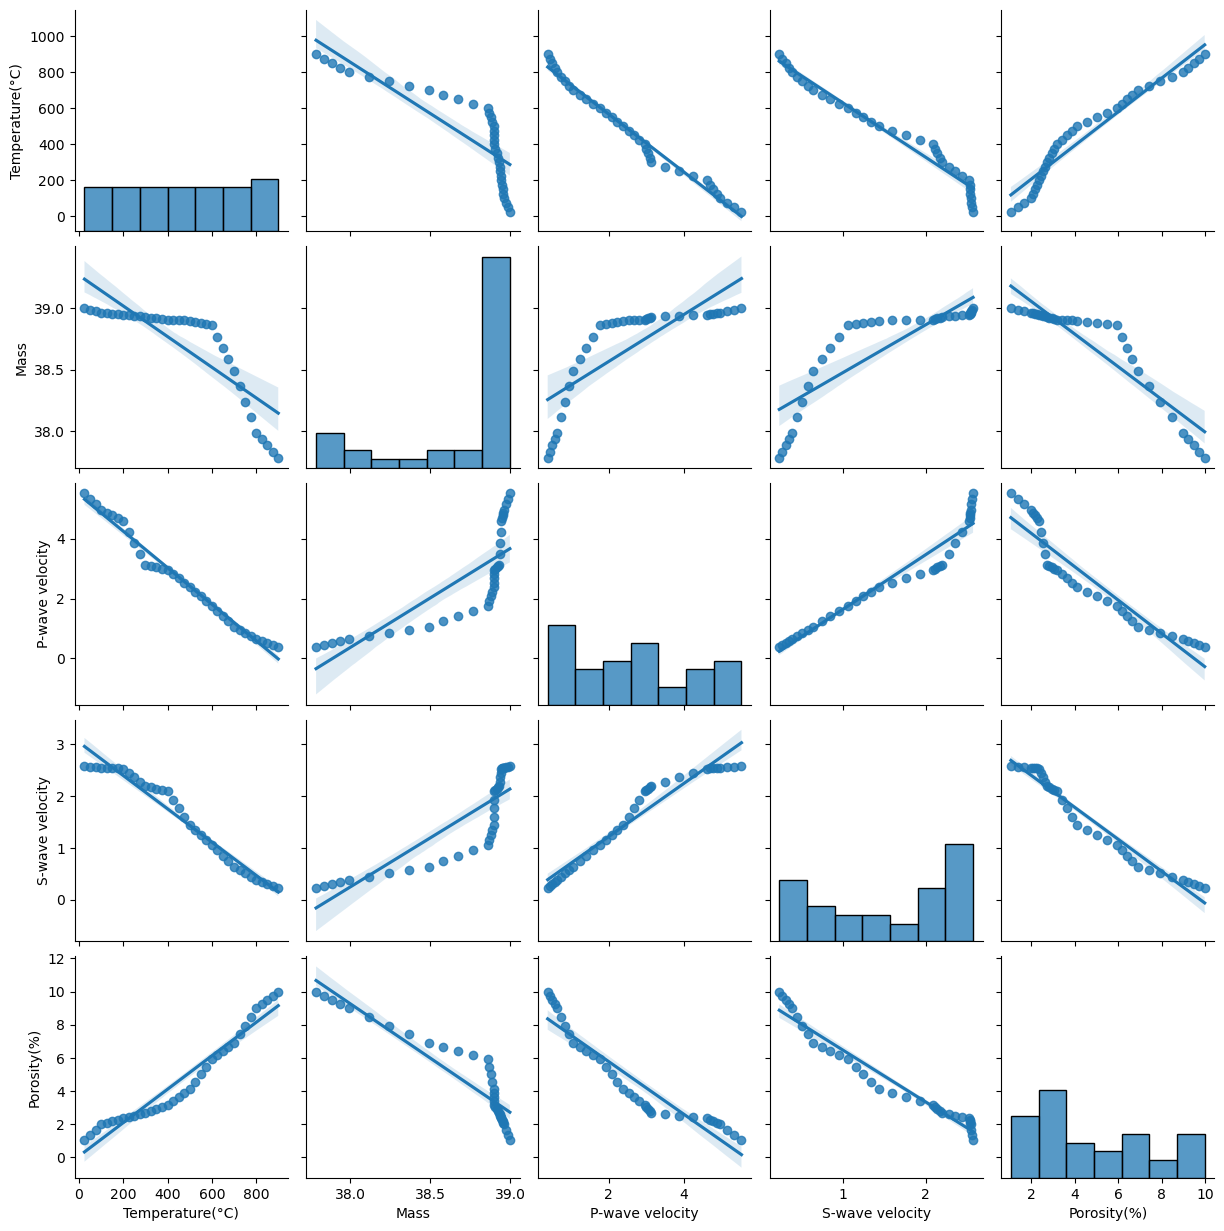

In [17]:
sns.pairplot(df2,kind="reg")

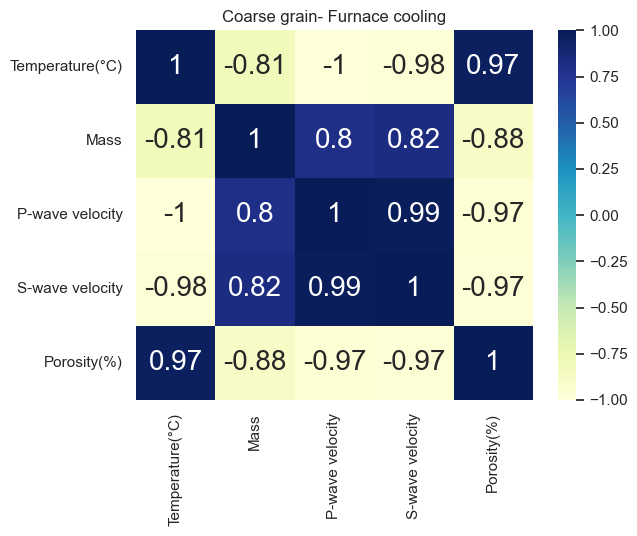

In [18]:
#heat map 
sns.set(font_scale=1)
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap='YlGnBu',annot_kws={"size": 20})
plt.title("Coarse grain- Furnace cooling")
plt.show()

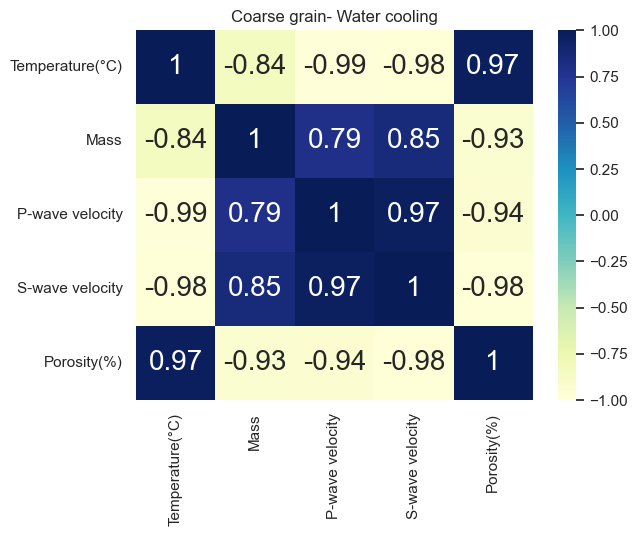

In [19]:
#heat map 
sns.set(font_scale=1)
sns.heatmap(df2.corr(),vmin=-1,vmax=1,annot=True,cmap='YlGnBu',annot_kws={"size": 20})
plt.title("Coarse grain- Water cooling")
plt.show()

In [20]:
#storing relevant features as inputs
#storing the 'DML' as output feature
inputs= df[['Temperature(°C)','Mass','P-wave velocity','S-wave velocity']]
output= df[['Porosity(%)']]

In [21]:
#storing relevant features as inputs
#storing the 'DML' as output feature
inputs2= df2[['Temperature(°C)','Mass','P-wave velocity','S-wave velocity']]
output2= df2[['Porosity(%)']]



In [22]:
#input features(independent variable)
inputs.head(5)

,Temperature(°C),Mass,P-wave velocity,S-wave velocity
0,25,38.9990,5.74600,2.81300
1,50,38.9857,5.62700,2.77467
2,75,38.9723,5.50800,2.73633
3,100,38.9590,5.38900,2.69800
4,125,38.9545,5.22125,2.65275


In [23]:
#output feature(dependent variable)
output.head(5)

,Porosity(%)
0,0.0720
1,0.1140
2,0.1560
3,0.1980
4,0.2275


In [24]:
#splitting the dataset into the training set and test set 
from sklearn.model_selection import train_test_split

input_train,input_test,output_train,output_test=train_test_split(inputs,output,test_size=0.2,random_state=0)

In [25]:
#splitting the dataset into the training set and test set 
from sklearn.model_selection import train_test_split

input_train2,input_test2,output_train2,output_test2=train_test_split(inputs2,output2,test_size=0.2,random_state=0)

In [26]:
#fitting multiple linear regression to the training set 
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(input_train, output_train)

LinearRegression()

In [27]:
#fitting multiple linear regression to the training set 
from sklearn import linear_model
regr2 = linear_model.LinearRegression()
regr2.fit(input_train2, output_train2)

LinearRegression()

In [28]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-33.77025428]
Coefficients: 
 [[ 0.02746115  0.44591114  5.5165434  -5.8150845 ]]


In [29]:
print('Intercept: \n', regr2.intercept_)
print('Coefficients: \n', regr2.coef_)

Intercept: 
 [83.0421675]
Coefficients: 
 [[ 0.0071262  -2.10010429  0.58369481 -1.21506416]]


In [30]:
phi_pred_CG_FC=regr.predict(input_test)
phi_pred_CG_FC

array([[6.81391511],
       [3.6243768 ],
       [2.46392005],
       [6.39644963],
       [4.13935897],
       [2.16293149],
       [0.59652618],
       [0.14064562]])

In [31]:
phi_pred_CG_WC=regr2.predict(input_test2)

In [32]:
#calculating accuracy metrics using R-square value 
from sklearn.metrics import r2_score 

score=r2_score(output_test,phi_pred_CG_FC)

In [33]:
#calculating accuracy metrics using R-square value 
from sklearn.metrics import r2_score 

score2=r2_score(output_test2,phi_pred_CG_WC)

In [34]:
score


0.9088173060806134

In [35]:
score2

0.9950992351209335

In [36]:
input_test


,Temperature(°C),Mass,P-wave velocity,S-wave velocity
31,800,38.7990,0.648258,0.388954
20,525,38.9005,2.777500,1.666500
16,425,38.9145,3.538000,2.116350
30,775,38.7995,0.780856,0.468513
22,575,38.8995,2.354500,1.412700
15,400,38.9190,3.721000,2.224000
10,275,38.9320,4.321250,2.473500
2,75,38.9723,5.508000,2.736330


In [37]:
input_test2

,Temperature(°C),Mass,P-wave velocity,S-wave velocity
31,800,37.9890,0.63540,0.38124
20,525,38.8890,2.23300,1.33980
16,425,38.9005,2.81725,1.92885
30,775,38.1145,0.74130,0.44478
22,575,38.8690,1.92100,1.15260
15,400,38.9010,2.96000,2.09400
10,275,38.9345,3.49725,2.27950
2,75,38.9737,5.15033,2.55600


In [38]:
measured_CG_FC=output_test
measured_CG_WC=output_test2


In [39]:
measured_CG_FC=measured_CG_FC.to_numpy()
measured_CG_WC=measured_CG_WC.to_numpy()


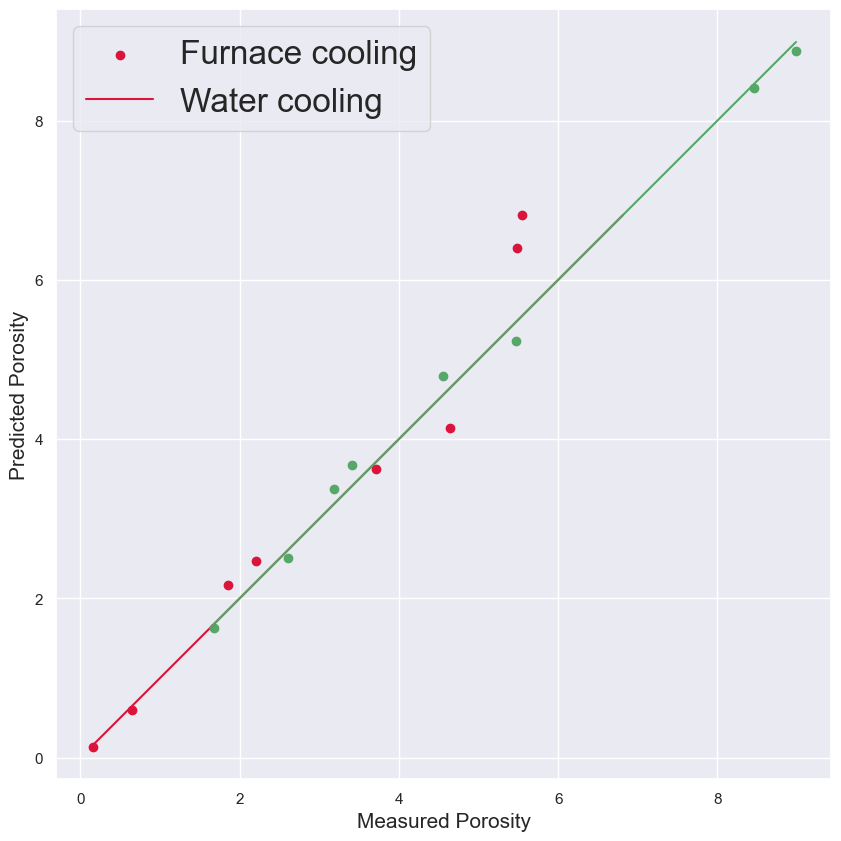

In [40]:

predicted_value=phi_pred_CG_FC
predicted_value2=phi_pred_CG_WC
measured=measured_CG_FC
measured2=measured_CG_WC
plt.figure(figsize=(10,10))
plt.scatter(measured, predicted_value, c='crimson')

plt.axis('equal')
p1 = max(max(predicted_value), max(measured))
p2 = min(min(predicted_value), min(measured))
plt.plot([p1, p2], [p1, p2], 'crimson')

plt.scatter(measured2, predicted_value2, c='g')
q1 = max(max(predicted_value2), max(measured2))
q2 = min(min(predicted_value2), min(measured2))
plt.plot([q1, q2], [q1, q2], 'g')
plt.xlabel('Measured Porosity', fontsize=15)
plt.ylabel('Predicted Porosity', fontsize=15)

plt.legend(['Furnace cooling','Water cooling'],fontsize=24)

plt.show()

In [41]:
coef_table = pd.DataFrame(list(input_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",regr.coef_.transpose())


In [42]:
coef_table2 = pd.DataFrame(list(input_train2.columns)).copy()
coef_table2.insert(len(coef_table2.columns),"Coefs",regr2.coef_.transpose())


In [43]:
coef_table



,0,Coefs
0,Temperature(°C),0.027461
1,Mass,0.445911
2,P-wave velocity,5.516543
3,S-wave velocity,-5.815084


In [44]:
coef_table2

,0,Coefs
0,Temperature(°C),0.007126
1,Mass,-2.100104
2,P-wave velocity,0.583695
3,S-wave velocity,-1.215064


In [45]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
clf = RandomForestRegressor(n_estimators = 80, random_state = 0)

# fit the regressor with x and y data
clf.fit(input_train, output_train.values.ravel())

RandomForestRegressor(n_estimators=80, random_state=0)

In [46]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
clf2 = RandomForestRegressor(n_estimators = 80, random_state = 0)

# fit the regressor with x and y data
clf2.fit(input_train2, output_train2.values.ravel())

RandomForestRegressor(n_estimators=80, random_state=0)

In [47]:
RF_pred_CG_FC = clf.predict(input_test) # test the output by changing values
RF_pred_CG_WC = clf2.predict(input_test2) # test the output by changing values

In [48]:
from sklearn.metrics import r2_score 

score_RF=r2_score(output_test,RF_pred_CG_FC)
score_RF

0.9704267753929872

In [49]:
from sklearn.metrics import r2_score 

score_RF2=r2_score(output_test2,RF_pred_CG_WC)
score_RF2

0.9966142687040201

Model using Random forest fits quite well !

In [50]:
output_test

,Porosity(%)
31,5.55000
20,3.71875
16,2.20825
30,5.47725
22,4.63825
15,1.85800
10,0.64825
2,0.15600


In [51]:
RF_pred_CG_WC

array([9.21308125, 4.52005313, 3.53027813, 8.16316562, 5.36447188,
       3.23025313, 2.62589375, 1.68547463])

In [52]:
def mape(actual, predicted): 
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [53]:
mape(output_test2,RF_pred_CG_WC)

73.00362315376564

C:\Users\prasa\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


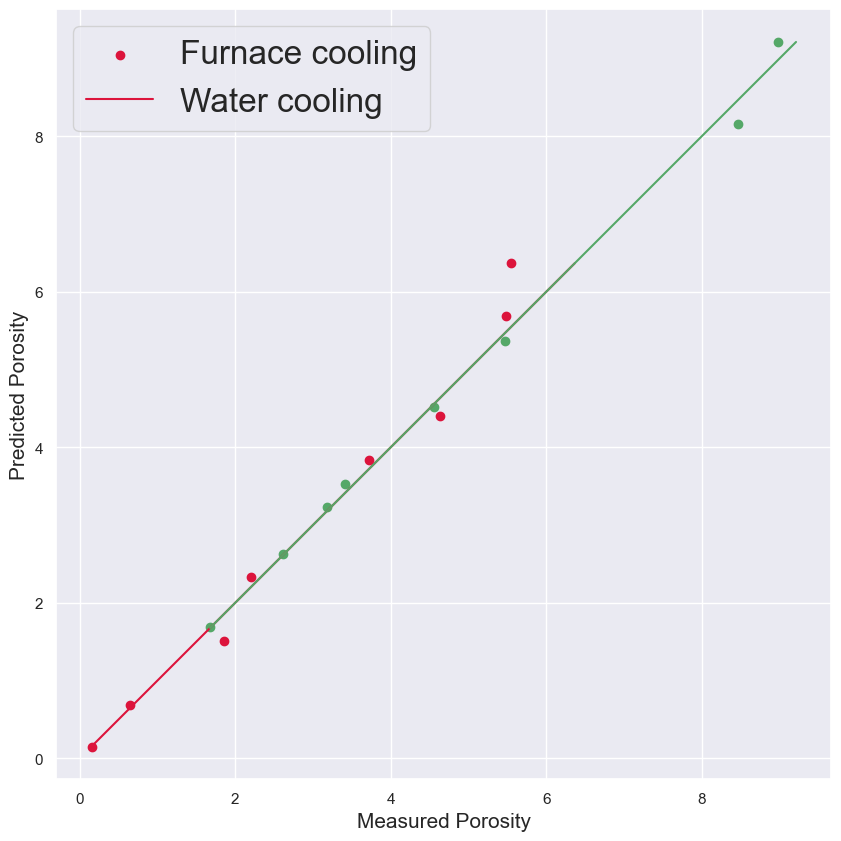

In [54]:
predicted_value=RF_pred_CG_FC
predicted_value2=RF_pred_CG_WC
plt.figure(figsize=(10,10))
plt.scatter(measured, predicted_value, c='crimson')

plt.axis('equal')
p1 = max(max(predicted_value), max(measured))
p2 = min(min(predicted_value), min(measured))
plt.plot([p1, p2], [p1, p2], 'crimson')
plt.scatter(measured2, predicted_value2, c='g')
q1 = max(max(predicted_value2), max(measured2))
q2 = min(min(predicted_value2), min(measured2))

plt.plot([q1, q2], [q1, q2], 'g')
plt.xlabel('Measured Porosity', fontsize=15)
plt.ylabel('Predicted Porosity', fontsize=15)

plt.legend(['Furnace cooling','Water cooling'],fontsize=24)

plt.show()

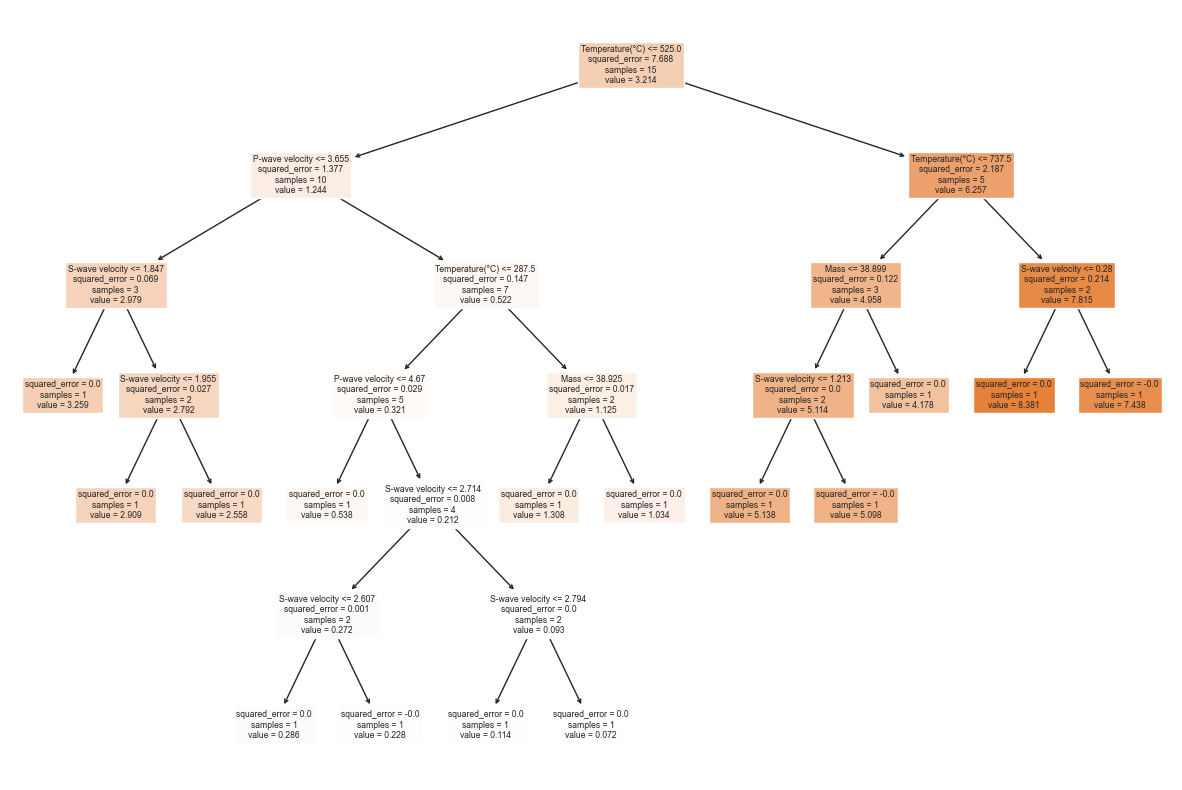

In [55]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf.estimators_[10],feature_names=df.columns,filled=True)
plt.savefig('out.pdf')

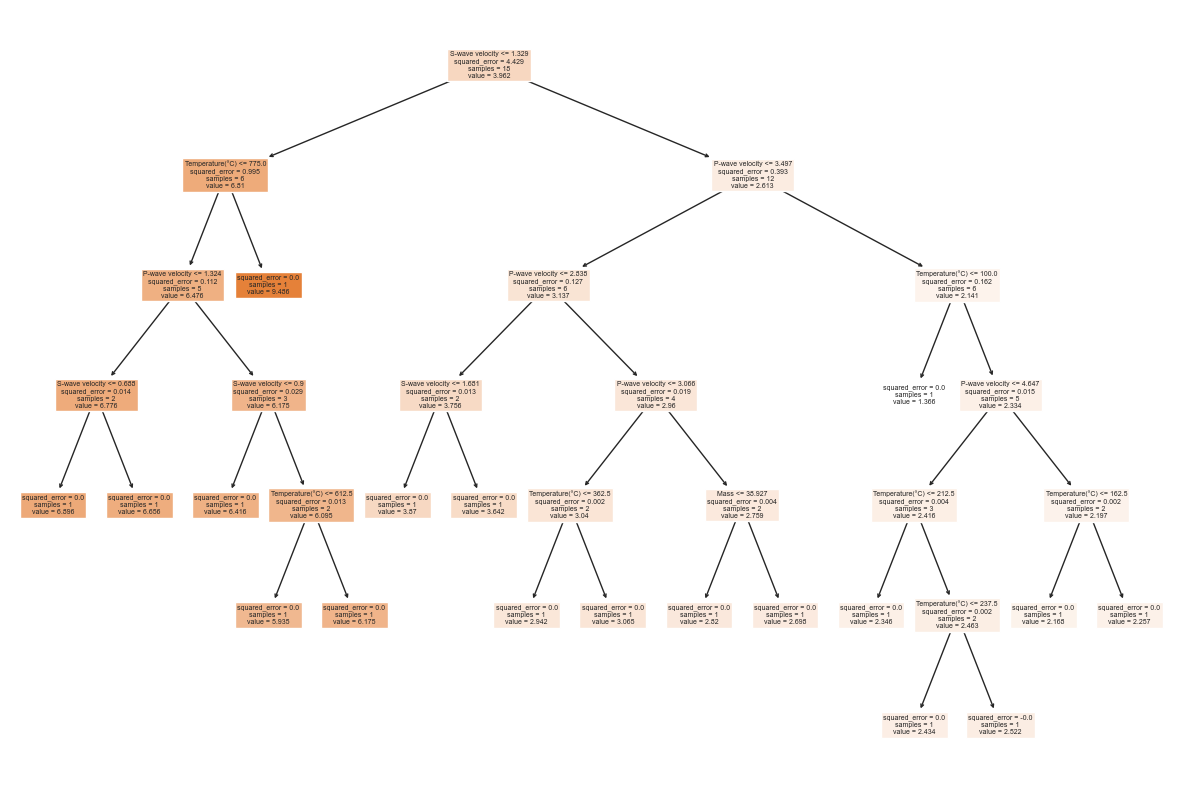

In [56]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf2.estimators_[1],feature_names=df2.columns,filled=True)
plt.savefig('out2.pdf')

In [57]:
#using knn model 
from sklearn.neighbors import KNeighborsRegressor 
# Initialize kNN
knn = KNeighborsRegressor(n_neighbors=3,weights='distance')

# Fit and score
knn.fit(input_train, output_train)
knn_pred_CG_FC=knn.predict(input_test)


score_knn=r2_score(output_test,knn_pred_CG_FC)
score_knn

0.9698467310395277

In [58]:
#using knn model 
from sklearn.neighbors import KNeighborsRegressor 
# Initialize kNN
knn2 = KNeighborsRegressor(n_neighbors=3,weights='distance')

# Fit and score
knn2.fit(input_train2, output_train2)
knn_pred_CG_WC=knn2.predict(input_test2)
score_knn2=r2_score(output_test2,knn_pred_CG_WC) 
score_knn2

0.9965375167927514

In [59]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(input_train, output_train)

C:\Users\prasa\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [60]:
from sklearn.svm import SVR
regressor2 = SVR(kernel = 'linear')
regressor2.fit(input_train2, output_train2)

C:\Users\prasa\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [61]:
svr_pred_CG_FC=regressor.predict(input_test)
svr_pred_CG_WC=regressor2.predict(input_test2)

C:\Users\prasa\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


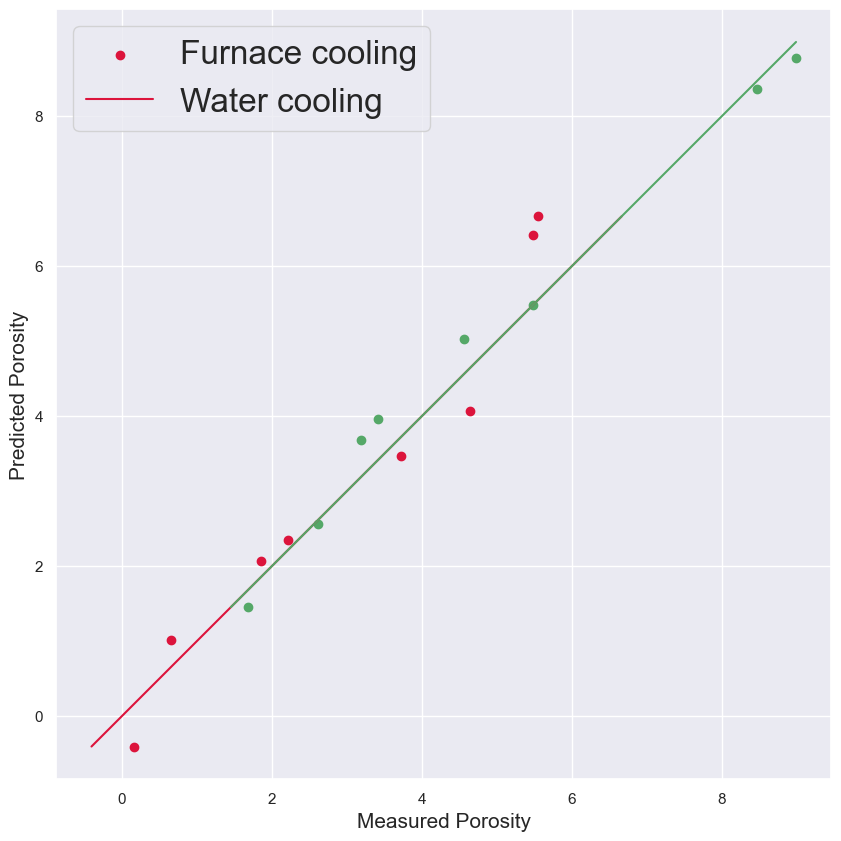

In [62]:
predicted_value=svr_pred_CG_FC
predicted_value2=svr_pred_CG_WC
measured=measured_CG_FC
measured2=measured_CG_WC
plt.figure(figsize=(10,10))
plt.scatter(measured, predicted_value, c='crimson')

p1 = max(max(predicted_value), max(measured))
p2 = min(min(predicted_value), min(measured))
plt.plot([p1, p2], [p1, p2], 'crimson')


plt.scatter(measured2, predicted_value2, c='g')
q1 = max(max(predicted_value2), max(measured2))
q2 = min(min(predicted_value2), min(measured2))

plt.plot([q1, q2], [q1, q2], 'g')

plt.axis('equal')
plt.xlabel('Measured Porosity', fontsize=15)
plt.ylabel('Predicted Porosity', fontsize=15)

plt.legend(['Furnace cooling','Water cooling'],fontsize=24)

plt.show()

In [63]:
mse=mean_squared_error(output_test,svr_pred_CG_FC)
rmse=np.sqrt(mse)
rmse

0.6142948300504815

In [64]:
mse2=mean_squared_error(output_test2,svr_pred_CG_WC)
rmse2=np.sqrt(mse2)
rmse2

0.3285272764456033

In [65]:
from sklearn.metrics import r2_score 

score_svr=r2_score(output_test,svr_pred_CG_FC)
score_svr

0.9038017839897355

In [66]:
from sklearn.metrics import r2_score 

score_svr2=r2_score(output_test2,svr_pred_CG_WC)
score_svr2

0.982910620128929

In [67]:
regressor.coef_


array([[ 0.00668494, -0.59773016,  0.26808421, -1.45776507]])

In [68]:
regressor2.coef_

array([[ 0.01091168, -1.48869954,  0.80423944, -0.7258521 ]])

In [69]:
regressor.intercept_


array([24.89742802])

In [70]:
regressor2.intercept_

array([56.36506292])

In [71]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(input_train, output_train)

y_pred_CG_FC = xgb_model.predict(input_test)

mse=mean_squared_error(output_test, y_pred_CG_FC)

print(np.sqrt(mse))

[09:45:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
0.4375113495095116


In [72]:
from sklearn.metrics import r2_score 

score_xgb=r2_score(output_test,y_pred_CG_FC)
score_xgb

0.9512031323628481

In [73]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(input_train2, output_train2)

y_pred_CG_WC = xgb_model.predict(input_test2)

mse=mean_squared_error(output_test2, y_pred_CG_WC)

print(np.sqrt(mse))

[09:45:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
0.3407180358572367


In [74]:
from sklearn.metrics import r2_score 

score_xgb2=r2_score(output_test2,y_pred_CG_WC)
score_xgb2

0.9816188074722856

C:\Users\prasa\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


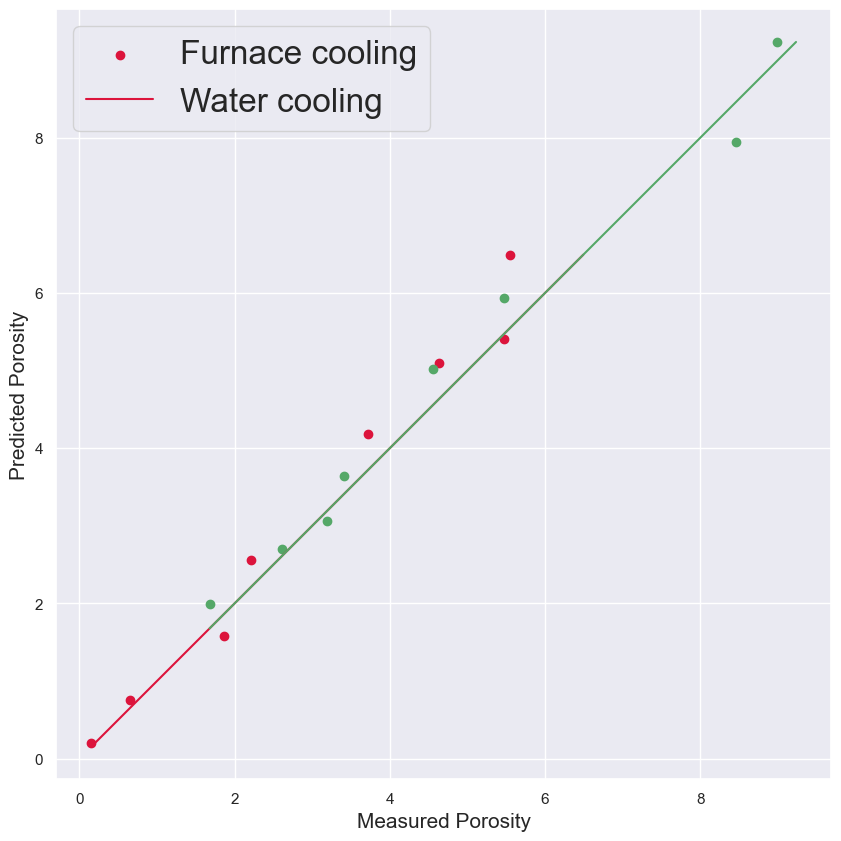

In [75]:
predicted_value=y_pred_CG_FC
predicted_value2=y_pred_CG_WC
measured=measured_CG_FC
measured2=measured_CG_WC

plt.figure(figsize=(10,10))
plt.scatter(measured, predicted_value, c='crimson')


p1 = max(max(predicted_value), max(measured))
p2 = min(min(predicted_value), min(measured))
plt.plot([p1, p2], [p1, p2], 'crimson')


plt.scatter(measured2, predicted_value2, c='g')
q1 = max(max(predicted_value2), max(measured2))
q2 = min(min(predicted_value2), min(measured2))

plt.plot([q1, q2], [q1, q2], 'g')
plt.xlabel('Measured Porosity', fontsize=15)
plt.ylabel('Predicted Porosity', fontsize=15)

plt.legend(['Furnace cooling','Water cooling'],fontsize=24)
plt.axis('equal')


plt.show()

In [76]:
#storing FC MLR, Random forest,SVR and XGBoost in order, predicted data 
#Furnace cooling
%store phi_pred_CG_FC
%store RF_pred_CG_FC
%store svr_pred_CG_FC
%store y_pred_CG_FC 
%store knn_pred_CG_FC

Stored 'phi_pred_CG_FC' (ndarray)
Stored 'RF_pred_CG_FC' (ndarray)
Stored 'svr_pred_CG_FC' (ndarray)
Stored 'y_pred_CG_FC' (ndarray)
Stored 'knn_pred_CG_FC' (ndarray)


In [77]:
#storing FC MLR, Random forest,SVR and XGBoost in order, predicted data 
#water cooling
%store phi_pred_CG_WC
%store RF_pred_CG_WC
%store svr_pred_CG_WC
%store y_pred_CG_WC 
%store knn_pred_CG_WC

Stored 'phi_pred_CG_WC' (ndarray)
Stored 'RF_pred_CG_WC' (ndarray)
Stored 'svr_pred_CG_WC' (ndarray)
Stored 'y_pred_CG_WC' (ndarray)
Stored 'knn_pred_CG_WC' (ndarray)


In [78]:
#measured data ,i.e. output_test data 
#furnace cooling
%store measured_CG_FC

#water cooling
%store measured_CG_WC


Stored 'measured_CG_FC' (ndarray)
Stored 'measured_CG_WC' (ndarray)


In [79]:
%store data_CG_FC
%store data_CG_WC

Stored 'data_CG_FC' (DataFrame)
Stored 'data_CG_WC' (DataFrame)
